**This notebook analyses the features like school, sex, age, etc. for a student to predict their final grades for math.** <br> This dataset is obtained from https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Import Relevant Libraries

In [1]:
import pandas as pd               ## to work with data frames
import numpy as np                ## for numerical calculations
import matplotlib.pyplot as plt   ## for plotting graphs
import seaborn as sns             ## for more presentable graphs
sns.set()
import statistics                 ## for making statistical calculations easier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Read the data into a Pandas DataFrame

In [2]:
path = "student-mat.csv"
st_mat_data = pd.read_csv(path)
st_mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


We need to first find out if the data has any missing values, and look at the summary of the data provided.

In [3]:
pd.set_option('display.max_columns', None)

st_mat_data.describe(include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


# Select appropriate features

The first row in the summary table gives the number of valid data points in the various columns. Nan values that is missing values are not counted. These values are the same for all the columns whixh tells us that there are no missing values here. So we do not need to drop any columns or impute values to deal with the missing values. We need to now select the featues that will affect the grades of the student to a greater degree. 

## Categorical features:

Let's look at the **school** data first

Let's look at the density histograms of the two schools to see the percentage of students in the different grade zones.

In [4]:
# get all the data of the students going to the GP school
GP_school_mat_full = st_mat_data[st_mat_data['school'] == 'GP']
# create a new table with just the final grades of the students from the GP school
GP_school = pd.DataFrame().assign(FGrade = GP_school_mat_full['G3'])
# get all the data of the students going to the MS school
MS_school_mat_full = st_mat_data[st_mat_data['school'] == 'MS']
# create a new table with just the final grades of the students from the MS school
MS_school = pd.DataFrame().assign(FGrade = MS_school_mat_full['G3'])

Text(0.5, 0, 'final grades')

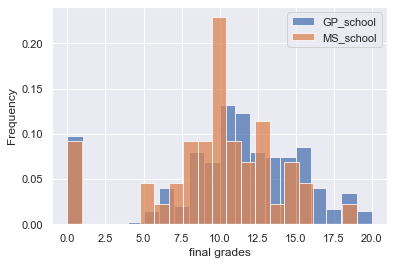

In [5]:
# plot the histograms for the final grades for the students from both schools
fig, ax = plt.subplots()
GP_school.plot(kind = 'hist', density = True, ax=ax, alpha = 0.75, bins=20)
MS_school.plot(kind = 'hist', density = True, ax=ax, alpha = 0.75, bins=20)
plt.legend(['GP_school', 'MS_school'])
plt.xlabel('final grades')

In [6]:
GP_total = st_mat_data.groupby('school').count()
GP_total

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GP,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349
MS,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46


There is a huge difference in the number of students in the sample data from the two schools. From the overlapping histograms, it looks like GP school has a higher percentage of students scoring higher grades and MS school has a higher percentage of students scoring lower grades. In order to see that difference is not random, we can consider the mean of the final grades of the sudents in the two schools and take their difference. We do not take the absolute difference as our claim is that MS school has a lesser percentage of students getting higher grades.

In [7]:
GP_mean = GP_school['FGrade'].mean()
MS_mean = MS_school['FGrade'].mean()
observed_stat_mean = GP_mean - MS_mean
observed_stat_mean

0.6421452597483501

I have used FGrade here as the column for final grade.

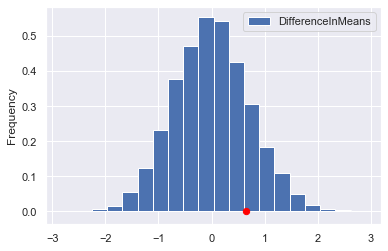

In [8]:
# create an array which will store our statistic for each iteration
differences = []
for i in np.arange(10000):
    # shuffle the final grades to make them random
    final_grades = np.random.permutation(st_mat_data['G3'])
    shuffled = st_mat_data.assign(shuffled_grade = final_grades)
    
    # find the statistic with the shuffled data
    GP = shuffled[shuffled['school'] == 'GP']
    GP_mean = GP['shuffled_grade'].mean()
    MS = shuffled[shuffled['school'] == 'MS']
    MS_mean = MS['shuffled_grade'].mean()
    statistic = GP_mean - MS_mean
    
    # add the statistic to the array
    differences = np.append(differences, statistic)

pd.DataFrame().assign(DifferenceInMeans=differences).plot(kind='hist', bins=20, density=True)
plt.scatter(observed_stat_mean, 0, color='red', s=40, zorder=10)

Looks like the observed value that we obtained is pretty random. So, the school does not play a very important role. So, we would not consider the school column as a variable to predict the grades. 
Now let's look at the **gender-wise** variation.

In [9]:
# get the data for girls 
female_data_full = st_mat_data[st_mat_data['sex'] == 'F']
# get the final grades for girls
female_data = pd.DataFrame().assign(FGrades = female_data_full['G3'])
# get the data for boys
male_data_full = st_mat_data[st_mat_data['sex'] == 'M']
# get the fina grades for boys
male_data = pd.DataFrame().assign(FGrades = male_data_full['G3'])

Text(0.5, 0, 'final grades')

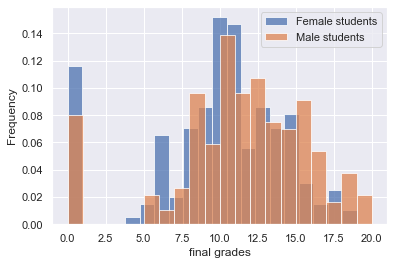

In [10]:
# plot the histograms for the final grades for boys and girls
fig, ax = plt.subplots()
female_data.plot(kind = 'hist', density = True, ax=ax, alpha = 0.75, bins=20)
male_data.plot(kind = 'hist', density = True, ax=ax, alpha = 0.75, bins=20)
plt.legend(['Female students', 'Male students'])
plt.xlabel('final grades')

In [11]:
gender_data = st_mat_data.groupby('sex').count()
gender_data

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
M,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187


In [12]:
female_mean = female_data['FGrades'].mean()
male_mean = male_data['FGrades'].mean()
observed_stat_gender_mean = male_mean - female_mean
observed_stat_gender_mean

0.9480923488276431

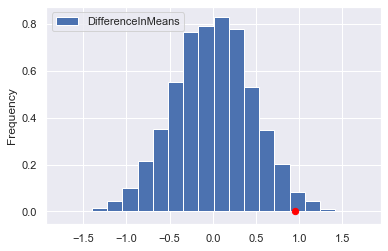

In [13]:
# create an array to store all the statistics from each iteration
differences = []
for i in np.arange(10000):
    # shuffle the final grades to make them random
    final_grades = np.random.permutation(st_mat_data['G3'])
    shuffled = st_mat_data.assign(shuffled_grade = final_grades)
    
    # find the statistic with the shuffled data
    females = shuffled[shuffled['sex'] == 'F']
    female_mean = females['shuffled_grade'].mean()
    males = shuffled[shuffled['sex'] == 'M']
    male_mean = males['shuffled_grade'].mean()
    statistic = male_mean - female_mean
    
    # add the statistic to the array
    differences = np.append(differences, statistic)

pd.DataFrame().assign(DifferenceInMeans=differences).plot(kind='hist', bins=20, density=True)
plt.scatter(observed_stat_gender_mean, 0, color='red', s=40, zorder=10)

In [14]:
p_value = np.count_nonzero(differences >= observed_stat_gender_mean) / len(differences)
p_value

0.0201

Therefore, the gender is a very important factor in the prediction of the grades. I will consider it.

Let's now look at **age**

### Converting numrical data into categorical data

In [15]:
age_data_full = st_mat_data.groupby('age').count()
age_data_full

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
16,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
17,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
18,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
19,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
20,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


We can break this age into two groups like **high school** and **college**. If we look at the number of students for each age, there is just one student of the age 22 and one student of the age 21. So we will categorize them into **high school students** and **college students**.

In [16]:
# create a function that returns high school or college depending on the age
def categorize(num):
    if num > 18:
        return "college"
    else:
        return "high school"

In [17]:
# apply the function to the age column
categorized_data = st_mat_data.assign(age_group = st_mat_data['age'].apply(categorize))
categorized_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,high school
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,high school
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,high school
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,high school
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,college
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,high school
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,college
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,high school


In [18]:
grouped = categorized_data.groupby('age_group').count()
grouped

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
college,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
high school,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366


In [19]:
# find the mean grades for the college students
college_data = categorized_data[categorized_data['age_group'] == 'college']
college_avg = college_data['G3'].mean()
college_avg

8.758620689655173

In [20]:
# find the mean grades for the high school students
high_school_data = categorized_data[categorized_data['age_group'] == 'high school']
high_school_avg = high_school_data['G3'].mean()
high_school_avg

10.546448087431694

Text(0.5, 0, 'final grades')

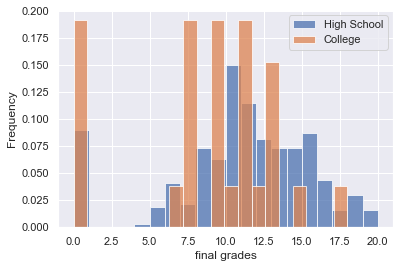

In [21]:
college_grades = pd.DataFrame().assign(FGrades = college_data['G3'])
high_school_grades = pd.DataFrame().assign(FGrades = high_school_data['G3'])

# plot the histograms for the final grades of the students of both age groups
fig, ax = plt.subplots()
high_school_grades.plot(kind = 'hist', density = True, ax=ax, alpha = 0.75, bins=20)
college_grades.plot(kind = 'hist', density = True, ax=ax, alpha = 0.75, bins=20)
plt.legend(['High School', 'College'])
plt.xlabel('final grades')

In [22]:
# find the observed statistic
college_mean = college_grades['FGrades'].mean()
high_school_mean = high_school_grades['FGrades'].mean()
observed_stat_age_mean = high_school_mean - college_mean
observed_stat_age_mean

1.787827397776521

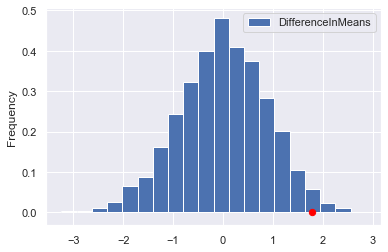

In [23]:
# create an array to store the statistic in each iteration
differences = []
for i in np.arange(10000):
    # shuffle the final grades to make them random
    final_grades = np.random.permutation(st_mat_data['G3'])
    shuffled = categorized_data.assign(shuffled_grade = final_grades)
    
    # find the statistic with the shuffled data
    college = shuffled[shuffled['age_group'] == 'college']
    college_mean = college['shuffled_grade'].mean()
    high_school = shuffled[shuffled['age_group'] == 'high school']
    high_school_mean = high_school['shuffled_grade'].mean()
    statistic = college_mean - high_school_mean
    
    # add the statistic to the array
    differences = np.append(differences, statistic)

pd.DataFrame().assign(DifferenceInMeans=differences).plot(kind='hist', bins=20, density=True)
plt.scatter(observed_stat_age_mean, 0, color='red', s=40, zorder=10)

In [24]:
p_value = np.count_nonzero(differences >= observed_stat_age_mean)/len(differences)
p_value

0.0187

We would want to consider this variable as calculate the grades as the p-value is less than 0.05.


We usually have the same procedure. So, let's create a function for this!

## Function to decide which categorical features to consider

In [25]:
# the function takes three arguments: the name of the column and the two values in the column
def feature_select(column, cat1, cat2):
    # get the means of the final grades for the two categories
    cat1_data = st_mat_data[st_mat_data[column] == cat1]
    cat2_data = st_mat_data[st_mat_data[column] == cat2]
    cat1_mean = cat1_data['G3'].mean()
    cat2_mean = cat2_data['G3'].mean()
    
    # the power variable helps to find the p-value by indicating the side of 
    # the histogram to which the observed statistic lies
    power = 0
    if (cat1_mean < cat2_mean):
        power = 1
    observed_stat = ((-1)**power)*abs(cat1_mean - cat2_mean)
    print("the observed statistic: %f" % observed_stat)
    
    # create an array to store the statistic in each iteration
    differences = []
    for i in np.arange(10000):
        # shuffle the final grades column to make them random
        final_grades = np.random.permutation(st_mat_data['G3'])
        shuffled = categorized_data.assign(shuffled_grade = final_grades)
    
        # find the statistic with the shuffled data
        cat1_shuffled = shuffled[shuffled[column] == cat1]
        cat1_shuffled_mean = cat1_shuffled['shuffled_grade'].mean()
        cat2_shuffled = shuffled[shuffled[column] == cat2]
        cat2_shuffled_mean = cat2_shuffled['shuffled_grade'].mean()
        statistic = ((-1)**power)*abs(cat1_shuffled_mean - cat2_shuffled_mean)
        
        # add the statistic to the array
        differences = np.append(differences, statistic)
    
    # find the p-value and ignore it if it greater than or equal to 0.05
    p_value = 0
    if power == 0:
        p_value = np.count_nonzero(differences >= observed_stat)/len(differences)
        print("the p-value is: %f" % p_value)
        if p_value < 0.05:
            print("We must use this column as a feature")
        else:
            print("It is okay to omit this column as a feature")
    else:
        p_value = np.count_nonzero(differences <= observed_stat)/len(differences)
        print("the p-value is: %f" % p_value)
        if p_value < 0.05:
            print("We must use this column as a feature")
        else:
            print("It is okay to omit this column as a feature")

In [26]:
feature_select('address', 'U', 'R')

the observed statistic: 1.162903
the p-value is: 0.033500
We must use this column as a feature


The students in the urban areas have more access to advanced and focused learning which may be responsible for higher grades. So, it makes sense to include this feature as a variable.

In [27]:
feature_select('Pstatus', 'T', 'A')

the observed statistic: -0.870263
the p-value is: 0.257100
It is okay to omit this column as a feature


The status of the parents would affect the child psychologically to some extent, but since the divorce rate is pretty high, most youngsters are familiar with such cases and it may not affect their scores a whole lot. So, we can choose to ignore them.

In [28]:
feature_select('schoolsup', 'yes', 'no')

the observed statistic: -1.129674
the p-value is: 0.097800
It is okay to omit this column as a feature


I think that extra educational support would help the students perform better. But, the results tell us a different story. So, I will choose to exclude this variable for now, but we can try it later.

In [29]:
feature_select('famsup', 'yes', 'no')

the observed statistic: -0.367796
the p-value is: 0.447800
It is okay to omit this column as a feature


Logically, family support could contribute to good grades. But the results tell us a different story so I will exclude it for now, but we can check it out later.

In [30]:
feature_select('paid', 'yes', 'no')

the observed statistic: 0.936671
the p-value is: 0.045000
We must use this column as a feature


Extra paid classes that focus towards a particular subject help the students perform better and the results too, agree with this. So, I will definitely include this as a feature.

In [31]:
feature_select('activities', 'yes', 'no')

the observed statistic: 0.147356
the p-value is: 0.754200
It is okay to omit this column as a feature


Sometimes, extra-curricular activities are thought to refresh the mind and rejuvinate ones spirits, which would concentration and boost one's grades. On the other hand, spending too much time in extra-cirricular activities would reduce one's studytime and hence negatively affect grades. So, this kind of balances ot out and does not hold as a good predictor of grades.

In [32]:
feature_select('nursery', 'yes', 'no')

the observed statistic: 0.584415
the p-value is: 0.310400
It is okay to omit this column as a feature


Things taught in nursery can be easily caught up with and does not really affect grades in high school and college

In [33]:
feature_select('higher', 'yes', 'no')

the observed statistic: 3.808000
the p-value is: 0.000400
We must use this column as a feature


Students wanting to pursue higher education would want their scores to be high for admission into good universities, which is why their grades would typically be higher. So, we must include this feature as a variable.

In [34]:
feature_select('internet', 'yes', 'no')

the observed statistic: 1.207930
the p-value is: 0.052700
It is okay to omit this column as a feature


There are alternatives to access the internet when there is no connection at home. So, it should not be a hige problem.

In [35]:
feature_select('romantic', 'yes', 'no')

the observed statistic: -1.260744
the p-value is: 0.009500
We must use this column as a feature


Being involved in romantic relationships can reduce concentration in studies and negatively affect grades.

In [36]:
feature_select('famsize', 'LE3', 'GT3')

the observed statistic: 0.822064
the p-value is: 0.107800
It is okay to omit this column as a feature


The number of members in the family is not likely to affect the final grades of the students.

Therefore, we consider the columns **sex**, **age_group**, **address**, **paid**, **higher**, and **romantic** as our features.
So, let's now create a table with all the columns that we want to consider, and drop the columns that we have decided not to consider.

In [37]:
# create a data frame with the columns that we chose as features
cat_labels = ['sex', 'address', 'paid', 'higher', 'romantic']
cat_final_data = st_mat_data[cat_labels]
cat_final_data = cat_final_data.assign(age_group = categorized_data['age_group'])
cat_final_data

,sex,address,paid,higher,romantic,age_group
0,F,U,no,yes,no,high school
1,F,U,no,yes,no,high school
2,F,U,yes,yes,no,high school
3,F,U,yes,yes,yes,high school
4,F,U,yes,yes,no,high school
...,...,...,...,...,...,...
390,M,U,yes,yes,no,college
391,M,U,no,yes,no,high school
392,M,R,no,yes,no,college
393,M,R,no,yes,no,high school


In [38]:
cat_to_num_data = pd.get_dummies(cat_final_data)
X = cat_to_num_data
y = pd.DataFrame().assign(final_grades = st_mat_data['G3'])
X = sm.add_constant(X)
cat_model = sm.OLS(y, X)
results = cat_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           final_grades   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     5.722
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           1.02e-05
Time:                        14:42:24   Log-Likelihood:                -1144.4
No. Observations:                 395   AIC:                             2303.
Df Residuals:                     388   BIC:                             2331.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.99

C:\Users\maitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\maitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\maitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\maitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\maitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

In [39]:
# drop the columns that we have gone through to make the feature selection process easier
checked_labels = ['sex', 'age', 'address', 'famsize', 'school', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'higher', 'internet', 'nursery', 'activities', 'romantic']
unchecked_data = st_mat_data.drop(columns = checked_labels)
unchecked_data

,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,1,1,3,6,5,6,6
1,1,1,at_home,other,course,father,1,2,0,5,3,3,1,1,3,4,5,5,6
2,1,1,at_home,other,other,mother,1,2,3,4,3,2,2,3,3,10,7,8,10
3,4,2,health,services,home,mother,1,3,0,3,2,2,1,1,5,2,15,14,15
4,3,3,other,other,home,father,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,services,services,course,other,1,2,2,5,5,4,4,5,4,11,9,9,9
391,3,1,services,services,course,mother,2,1,0,2,4,5,3,4,2,3,14,16,16
392,1,1,other,other,course,other,1,1,3,5,5,3,3,3,3,3,10,8,7
393,3,2,services,other,course,mother,3,1,0,4,4,1,3,4,5,0,11,12,10


Let's look at the numeric variable ***absences***

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


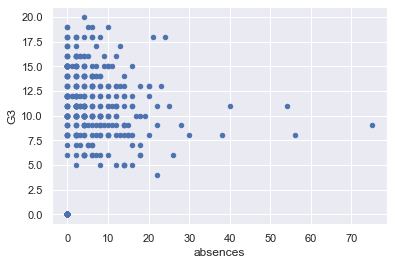

In [40]:
# plot a scatter plot between the number of absences and the final grades of the students to 
# find out if the number of absences affect the fianl grades.
unchecked_data.plot(kind = 'scatter', x = 'absences', y = 'G3')

It seems like there is not much correlation here. Let's find the correlation-coefficient $r$

In [41]:
# find the correlation coefficient using the formula
absences_mean = unchecked_data['absences'].mean()
absences_sd = statistics.stdev(unchecked_data['absences'], absences_mean)
absences_std_units = (unchecked_data['absences'] - absences_mean)/absences_sd

G3_mean = unchecked_data['G3'].mean()
G3_sd = statistics.stdev(unchecked_data['G3'], G3_mean)
G3_std_units = (unchecked_data['G3'] - G3_mean)/G3_sd

r = (absences_std_units * G3_std_units).mean()
r

0.03416061408386664

The correlation coefficient of 0.7 or more is considered strong. But, this correlation coefficient is too weak to consider.

Let's look at the variables **G1** and **G2**.

Here, we can look at the separatre relations of G1 and G2 with G3, or we consider G1 and G2 together and put them together as one variable so that they influence each other. For example, if a student has done well in both G1 and G2, then he/she must have done well in G3 as well, or if a student has not done well in both, then he/she may have performed poorly in G3, and so on. So, first let's look at the independent relation of G1 and G3, and G2 and G3.

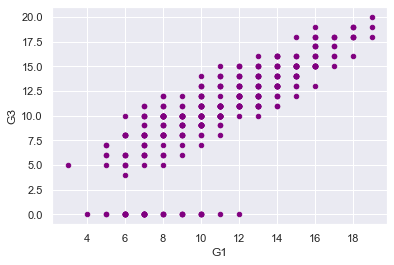

In [42]:
unchecked_data.plot(kind = 'scatter', x = 'G1', y = 'G3', c = 'purple')

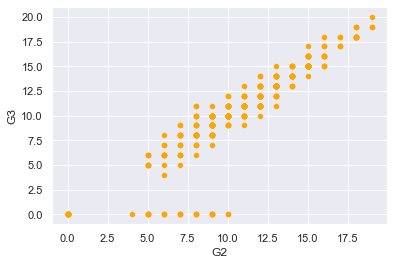

In [43]:
unchecked_data.plot(kind = 'scatter', x = 'G2', y = 'G3', c = 'orange')

There seems to be a very strong correlation between the factors we talked about. Let's look at how the variables themselves are correlated.

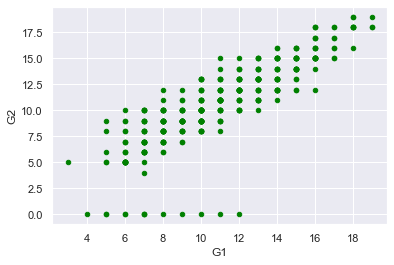

In [44]:
unchecked_data.plot(kind = 'scatter', x = 'G1', y = 'G2', c = 'green')

The predictors G1 and G2 have a high correlation. This leads to **multicollinearity** in the prediction.

But this multicollinearity will not affect our predictions to a huge extent (https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/). So, we can think about it later.

Let's create a function to this selection job for us.

In [45]:
# create a function that calcuates the correlation coefficient for numerical data 
# and decides whether or not to include that column as a feature
def select_num(column):
    col_mean = unchecked_data[column].mean()
    col_sd = statistics.stdev(unchecked_data[column], col_mean)
    col_std_units = (unchecked_data[column] - col_mean)/col_sd

    G3_mean = unchecked_data['G3'].mean()
    G3_sd = statistics.stdev(unchecked_data['G3'], G3_mean)
    G3_std_units = (unchecked_data['G3'] - G3_mean)/G3_sd

    r = (col_std_units * G3_std_units).mean()
    print("correlation-cofficient: %f" %r)
    if abs(r) >= 0.7 :
        print("We must include this column")
    else:
        print("Ignore this column!")

In [46]:
select_num('Walc')

correlation-cofficient: -0.051808
Ignore this column!


Weekend alcohol consumption would not have a significant direct relation with final grades since alcoholics who are smart will always score well.

In [47]:
select_num('health')

correlation-cofficient: -0.061179
Ignore this column!


The current health of the student is a misleading data point since we do not when this health status was recorded and if this data was not recorded before the exam, it might be a potential data leak. And, in any case, health status is logically not a good predictor of final grades.

In [48]:
select_num('Dalc')

correlation-cofficient: -0.054522
Ignore this column!


Just like weekend alcohol consumption, daily alcohol consumption is not a good factor to predict final grades.

In [49]:
select_num('goout')

correlation-cofficient: -0.132455
Ignore this column!


Going out with friends is not a good predictor, since one can go out with their friends throughout the year, but then study religiously before the exam and get good grades. Some students do not need to study a whole lot. We can also consider that students go out with their friends to study and they all study together.

In [50]:
select_num('freetime')

correlation-cofficient: 0.011279
Ignore this column!


Freetime is not a good indicator of final grades, since some students would need less time to graso concepts and prepare for exams which would give them more freetime, and some students would need more time to understand concepts which would leave them with less freetime.

In [51]:
select_num('famrel')

correlation-cofficient: 0.051233
Ignore this column!


The quality of family relationships may play a role in the mental health of students, but it would not necessarily affect the final grades of any student, since the final grades really dependend on the student's calibre, hard work, and understanding of the material.

In [52]:
select_num('failures')

correlation-cofficient: -0.359502
Ignore this column!


The number of failures would not affect the final grades of students.

In [53]:
select_num('studytime')

correlation-cofficient: 0.097572
Ignore this column!


In [54]:
select_num('traveltime')

correlation-cofficient: -0.116845
Ignore this column!


In [55]:
select_num('Medu')

correlation-cofficient: 0.216598
Ignore this column!


The mother's and the father's eduction would not play a significant role in their child's final grades since it is possible that they could get higher education for certain reasons but would want their child to study more. Parents' education is not a representative of their child's academic performance. 

In [56]:
select_num('Fedu')

correlation-cofficient: 0.152071
Ignore this column!


Let us just consider the factors sex, address, paid, higher, romantic, age_group, G1, and G2 for our first linear regression model.

Let's also fit a regression with just the numerial data and see how that compares with the categorical data.

In [57]:
X = pd.DataFrame().assign(G1 = st_mat_data['G1'], G2 = st_mat_data['G2'])
X = sm.add_constant(X)
y = pd.DataFrame().assign(final_grades = st_mat_data['G3'])
num_model = sm.OLS(y, X)
results = num_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           final_grades   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     906.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.01e-147
Time:                        14:42:27   Log-Likelihood:                -820.11
No. Observations:                 395   AIC:                             1646.
Df Residuals:                     392   BIC:                             1658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8300      0.335     -5.458      0.0

# Constructing our linear regression model

In [58]:
# create a table of the numerical columns that we finalized as helpful in predicting the grades
num_final_data = st_mat_data[['G1', 'G2']]

In [59]:
# merge the two tables to create the final dataset that we want to work with
final_data = pd.merge(cat_to_num_data, num_final_data, left_index = True, right_index = True)
final_data

,sex_F,sex_M,address_R,address_U,paid_no,paid_yes,higher_no,higher_yes,romantic_no,romantic_yes,age_group_college,age_group_high school,G1,G2
0,1,0,0,1,1,0,0,1,1,0,0,1,5,6
1,1,0,0,1,1,0,0,1,1,0,0,1,5,5
2,1,0,0,1,0,1,0,1,1,0,0,1,7,8
3,1,0,0,1,0,1,0,1,0,1,0,1,15,14
4,1,0,0,1,0,1,0,1,1,0,0,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,0,1,1,0,1,0,9,9
391,0,1,0,1,1,0,0,1,1,0,0,1,14,16
392,0,1,1,0,1,0,0,1,1,0,1,0,10,8
393,0,1,1,0,1,0,0,1,1,0,0,1,11,12


In [60]:
final_prediction = st_mat_data.G3

Now, let's split this data into training data and testing data, so that we can evaluate the accuracy of our model.

In [79]:
train_X, valid_X, train_y, valid_y = train_test_split(final_data, final_prediction, train_size = 0.8, test_size = 0.2, random_state=62)

In [80]:
X = final_data
y = final_prediction
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          5.85e-141
Time:                        15:19:32   Log-Likelihood:                -816.98
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     386   BIC:                             1688.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.52

C:\Users\maitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


How to interpret results of this OLS statsmodels linear regression summary: <br>
https://www.youtube.com/watch?v=U7D1h5bbpcs

Looking at the regression summary, it looks like the independent variables that we are have used relevant and fairly predictive features as are independent variables. The R-squared value is pretty close to 1 which suggests that there is lesser variation in the original final grades and the predicted final grades. The adjusted R-squared is pretty close to R-squared which suggests that the features that we have chosen are relevant to the target.

Now let's comapare the regressions that we have modeled.

In [81]:
# a function that calculates the maximum absolute error
def mae(predicted, observed):
    difference = predicted - observed
    absolute = abs(difference)
    mae = sum(absolute)/len(absolute)
    return mae

In [82]:
# the observed values are the actual grades obtained by the students
observed = st_mat_data['G3']

# get the results from the categorical data used for regression
cat_results = cat_model.fit()
cat_predict = cat_results.predict()
cat_mae = mae(cat_predict, observed)
print(f"The error for the categorical data: {cat_mae}")

The error for the categorical data: 3.3547521492440984


In [83]:
# get the results from the numerical data used for regression
num_results = num_model.fit()
num_predict = num_results.predict()
num_mae = mae(num_predict, observed)
print(f"The error for the numerical data: {num_mae}")

The error for the numerical data: 1.1375195041952428


In [84]:
# get the results from the combined data used for regression
combined_results = model.fit()
combined_predict = combined_results.predict()
combined_mae = mae(combined_predict, observed)
print(f"The error for the combined data: {combined_mae}")

The error for the combined data: 1.1424710699139682


In [85]:
# create a data frame with the predictions, actual values and a counter to correspond the values
plot_data = pd.DataFrame().assign(serial_num = np.arange(1, st_mat_data.shape[0]+1))
plot_data = plot_data.assign(combined_prediction = combined_predict)
plot_data = plot_data.assign(observed_grades = observed)
plot_data

,serial_num,combined_prediction,observed_grades
0,1,4.892841,6
1,2,3.928863,6
2,3,7.264302,10
3,4,14.069030,15
4,5,9.026332,10
...,...,...,...
390,391,8.260942,9
391,392,16.216420,16
392,393,7.393612,7
393,394,11.905092,10


In [86]:
# we will consider the data by breaking it up into parts so that it is easier to visualize
plot_data_first = plot_data[plot_data['serial_num'] <= 100]

Text(0, 0.5, 'grades')

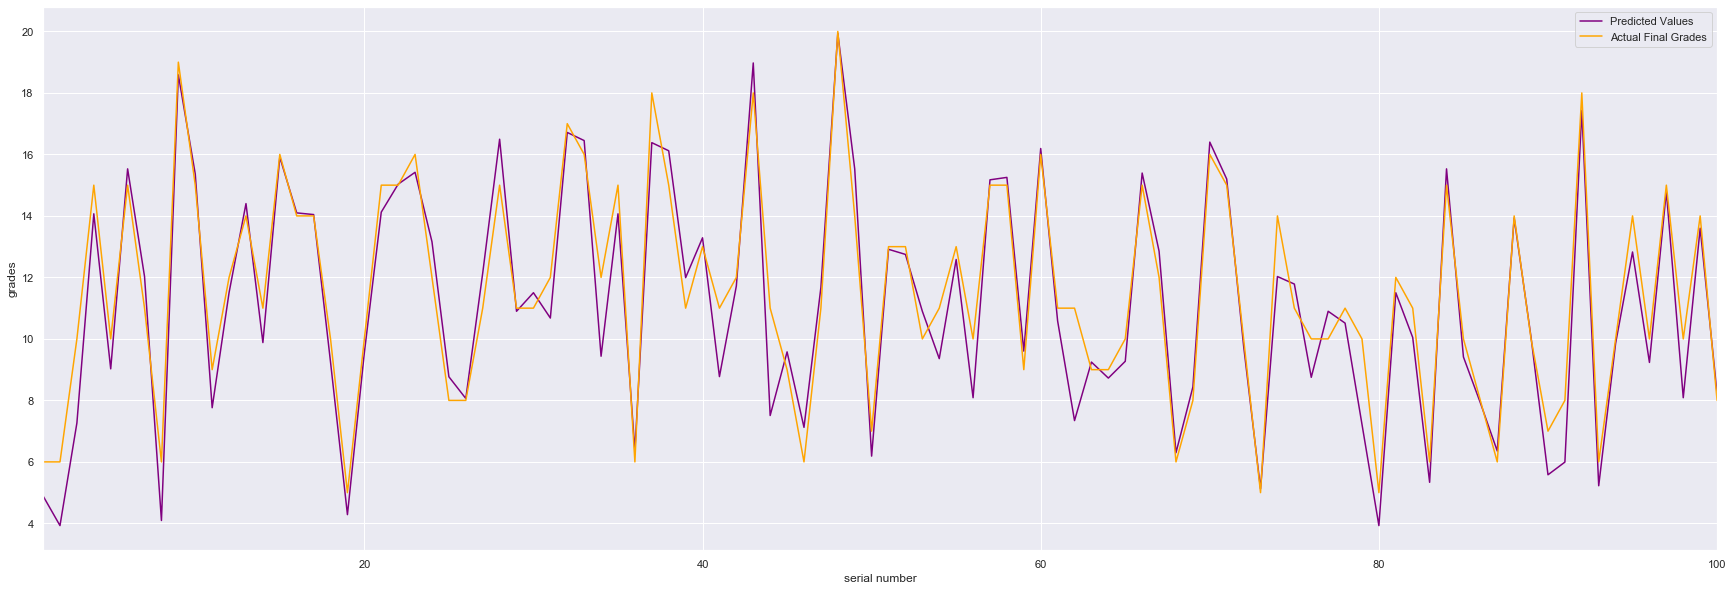

In [87]:
fig, ax = plt.subplots(figsize=(30, 10))
plot_data_first.plot(kind = 'line', ax = ax, x = 'serial_num', 
                          y = 'combined_prediction', c = 'purple')
plot_data_first.plot(kind = 'line', ax = ax, x = 'serial_num',
                          y = 'observed_grades', c = 'orange')
plt.legend(['Predicted Values', 'Actual Final Grades'])
plt.xlabel('serial number')
plt.ylabel('grades')

Text(0, 0.5, 'grades')

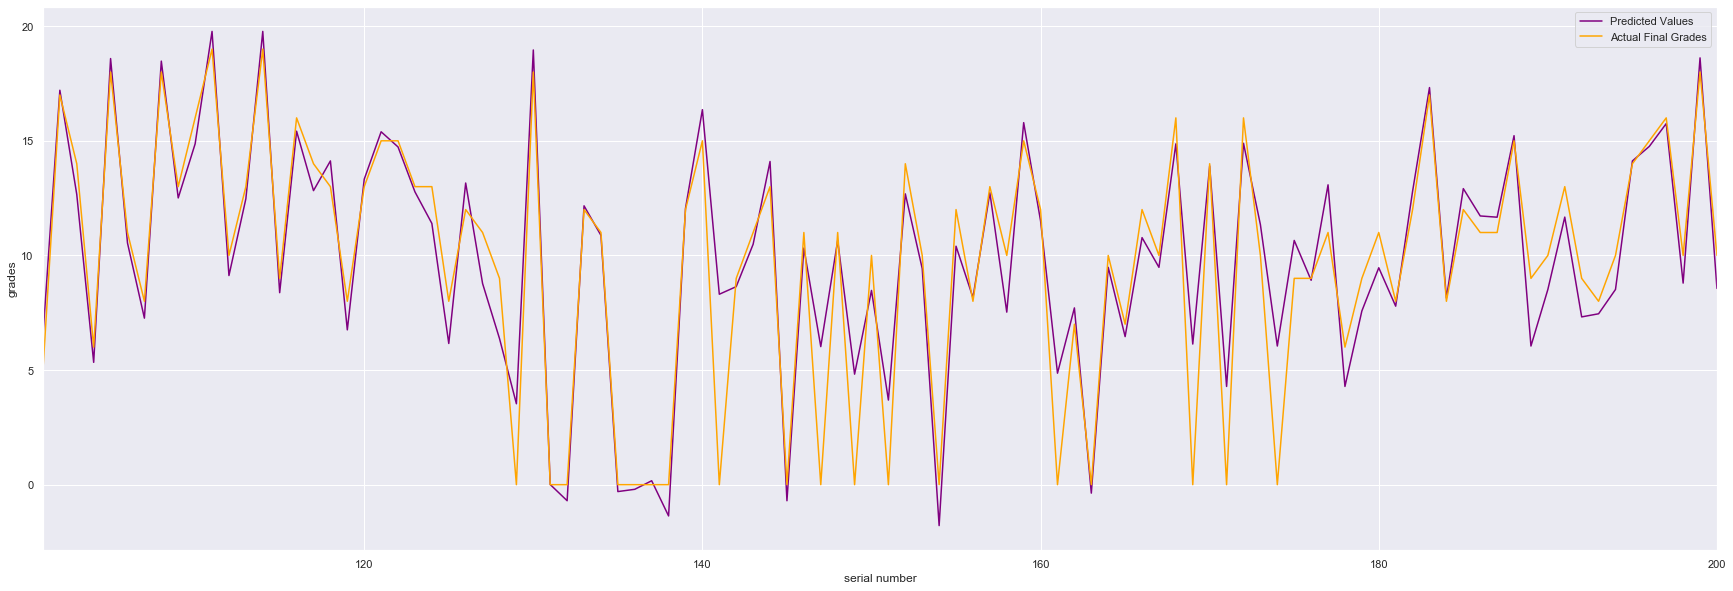

In [88]:
plot_data_second = plot_data[(plot_data['serial_num'] > 100) & (plot_data['serial_num'] <= 200)]
fig, ax = plt.subplots(figsize=(30, 10))
plot_data_second.plot(kind = 'line', ax = ax, x = 'serial_num', 
                          y = 'combined_prediction', c = 'purple')
plot_data_second.plot(kind = 'line', ax = ax, x = 'serial_num',
                          y = 'observed_grades', c = 'orange')
plt.legend(['Predicted Values', 'Actual Final Grades'])
plt.xlabel('serial number')
plt.ylabel('grades')

Text(0, 0.5, 'grades')

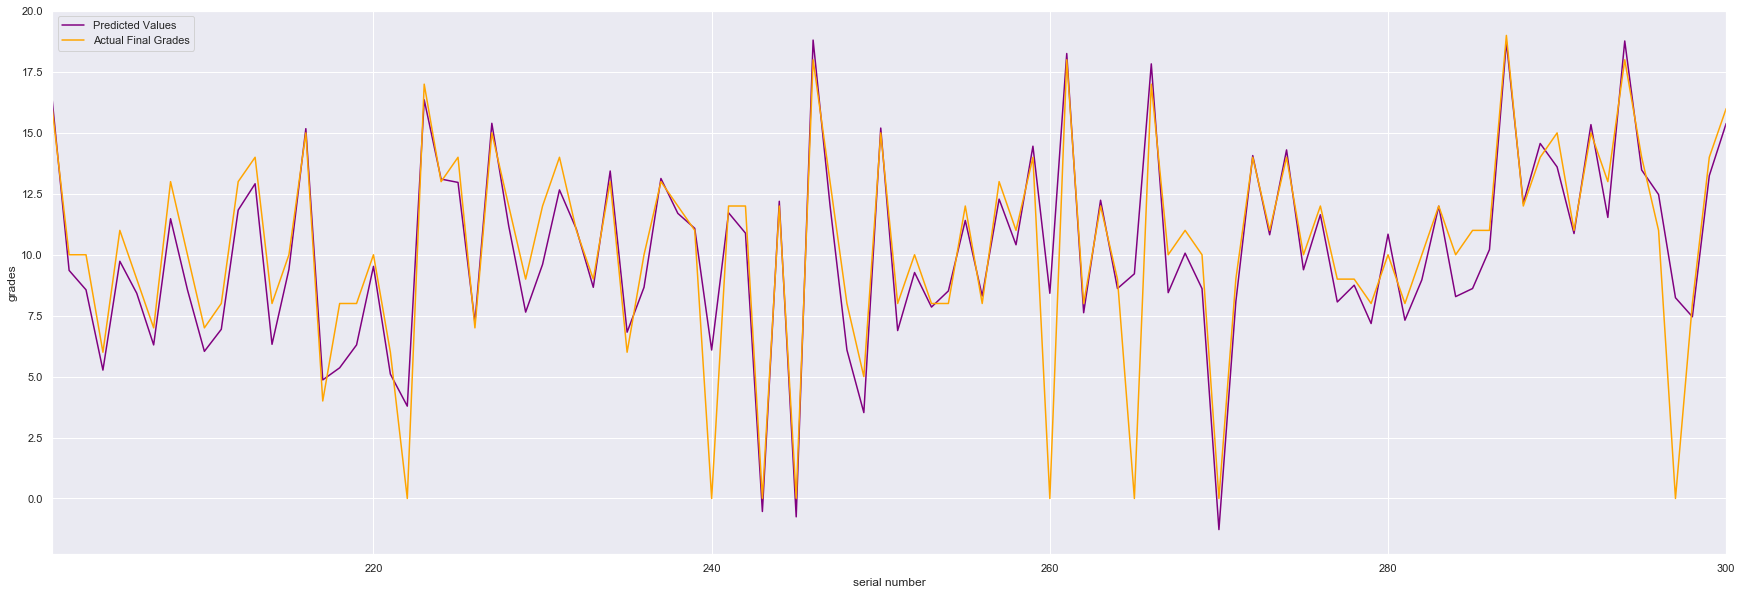

In [89]:
plot_data_third = plot_data[(plot_data['serial_num'] > 200) & (plot_data['serial_num'] <= 300)]
fig, ax = plt.subplots(figsize=(30, 10))
plot_data_third.plot(kind = 'line', ax = ax, x = 'serial_num', 
                          y = 'combined_prediction', c = 'purple')
plot_data_third.plot(kind = 'line', ax = ax, x = 'serial_num',
                          y = 'observed_grades', c = 'orange')
plt.legend(['Predicted Values', 'Actual Final Grades'])
plt.xlabel('serial number')
plt.ylabel('grades')

Text(0, 0.5, 'grades')

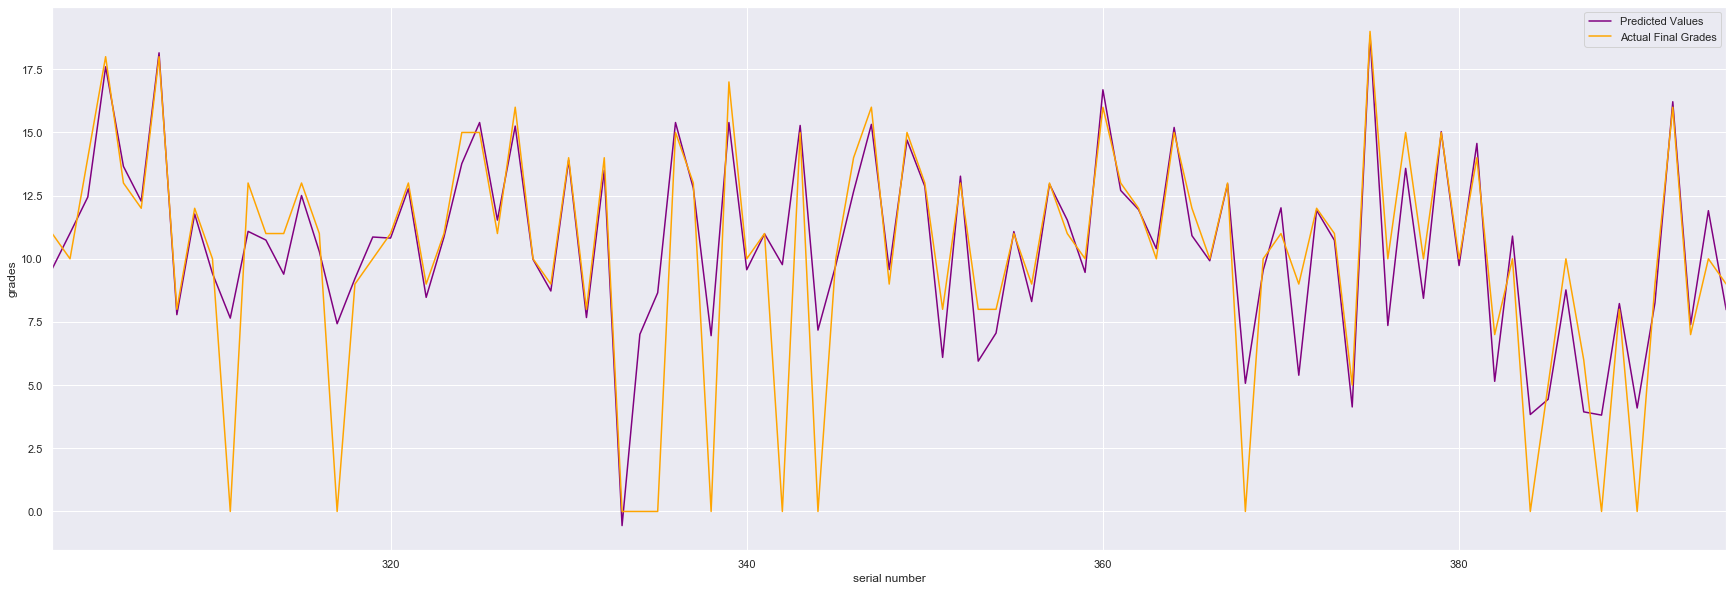

In [90]:
plot_data_fourth = plot_data[plot_data['serial_num'] > 300]
fig, ax = plt.subplots(figsize=(30, 10))
plot_data_fourth.plot(kind = 'line', ax = ax, x = 'serial_num', 
                          y = 'combined_prediction', c = 'purple')
plot_data_fourth.plot(kind = 'line', ax = ax, x = 'serial_num',
                          y = 'observed_grades', c = 'orange')
plt.legend(['Predicted Values', 'Actual Final Grades'])
plt.xlabel('serial number')
plt.ylabel('grades')

Let's look at our model's score with linear regression.

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(train_X, train_y)
print("Training score: {:.3f}".format(lr.score(train_X, train_y)))
print("Testing score: {:.3f}".format(lr.score(valid_X, valid_y)))

Training score: 0.818
Testing score: 0.845


We can improve this score using different models. Now, since we have categorical variables and numerical variables, and a decent number of samples, we can try random forest regressor which uses multiple different decision trees to predict the final grade. Decision trees can be very powerful since they go on splitting the data based on their properties. For example, the first layer of the decision tree might split the data into two categories: samples with G2 higher than 15 and samples with G2 less than or equal to 15. Then the split data would again be split into more sets based on some other properties. The regressor will then traverse the tree when a prediction has to be made and get the mean of the final grades of the samples that fall into the set as the sample to be predicted.
The overfitting problem in Decision Trees is pretty much solved in Random Forest Regressors which uses multiple Decision Trees.

In [110]:
from sklearn.ensemble import RandomForestRegressor
# We should find the best tuning parameters that will give us a good model 
# without any overfitting or underfitting
n_estimators_list = [500, 1000, 2000, 5000, 7500, 10000]
for num in n_estimators_list:
    forest = RandomForestRegressor(n_estimators=num, random_state=0)
    forest.fit(train_X, train_y)
    print(f"Training score for {num} n_estimators is: {forest.score(train_X, train_y)}")
    print(f"Testing score for {num} n_estimators is: {forest.score(valid_X, valid_y)}")

Training score for 500 n_estimators is: 0.9442124857518426
Testing score for 500 n_estimators is: 0.792712068009671
Training score for 1000 n_estimators is: 0.944274213008204
Testing score for 1000 n_estimators is: 0.7955502348929276
Training score for 2000 n_estimators is: 0.944347071974864
Testing score for 2000 n_estimators is: 0.7989866684529081
Training score for 5000 n_estimators is: 0.9443930038601783
Testing score for 5000 n_estimators is: 0.8003675244869681
Training score for 7500 n_estimators is: 0.9444908432547351
Testing score for 7500 n_estimators is: 0.8001783697868728
Training score for 10000 n_estimators is: 0.9445661811807434
Testing score for 10000 n_estimators is: 0.8000010074939512


We want the training and testing scores to be as close as possible and also high enough so that we can say that the model is good enough. So, in the case where n_estimators is 5000, we have the training score and the testing score high enough so we keep this parameter intact. Now, we tune the maximum depth of the Decision Trees.

In [100]:
depths = [15, 10, 7, 6, 5, 4, 3]
for depth in depths:
    forest = RandomForestRegressor(n_estimators=5000, random_state=0, max_depth=depth)
    forest.fit(train_X, train_y)
    print(f"Training score for depth {depth} is: {forest.score(train_X, train_y)}")
    print(f"Testing score for depth {depth} is: {forest.score(valid_X, valid_y)}")

Training score for depth 15 is: 0.9443929943061443
Testing score for depth 15 is: 0.8003591180078407
Training score for depth 10 is: 0.9417018795001099
Testing score for depth 10 is: 0.8009552790698614
Training score for depth 7 is: 0.90767510468281
Testing score for depth 7 is: 0.8245146067826974
Training score for depth 6 is: 0.8859004031679436
Testing score for depth 6 is: 0.8364289122036188
Training score for depth 5 is: 0.8640380694731664
Testing score for depth 5 is: 0.8440902434634509
Training score for depth 4 is: 0.8422538018936695
Testing score for depth 4 is: 0.8455482950246855
Training score for depth 3 is: 0.8231325416796111
Testing score for depth 3 is: 0.8408908820074825


The depth of 5 looks the best since the training and testing scores are very close to each other and the testing score is higher than before.

In [103]:
forest = RandomForestRegressor(n_estimators=5000, max_depth=5, random_state=0)
forest.fit(train_X, train_y)
print(f"Training score: {forest.score(train_X, train_y)}")
print(f"Testing score: {forest.score(valid_X, valid_y)}")

Training score: 0.8640380694731664
Testing score: 0.8440902434634509


Now, let's also try the GradientBoostingRegressor model which outperforms the RandomTreeRegressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
xgbooster = GradientBoostingRegressor(random_state=0)
xgbooster.fit(train_X, train_y)
print(f"Training score is: {xgbooster.score(train_X, train_y)}")
print(f"Testing score is: {xgbooster.score(valid_X, valid_y)}")

Training score is: 0.8767807901012793
Testing score is: 0.8499756590126045


We will now vary the depth of the Decision Trees and check if they make a difference.

In [97]:
depths = [15, 10, 7, 6, 5, 4, 3, 1]
for depth in depths:
    xgbooster = GradientBoostingRegressor(max_depth=depth, random_state=0)
    xgbooster.fit(train_X, train_y)
    print(f"Training score for depth {depth} is: {xgbooster.score(train_X, train_y)}")
    print(f"Testing score for depth {depth} is: {xgbooster.score(valid_X, valid_y)}")

Training score for depth 15 is: 0.9654544701355757
Testing score for depth 15 is: 0.6604912522544144
Training score for depth 10 is: 0.9654543812670464
Testing score for depth 10 is: 0.6982841985350923
Training score for depth 7 is: 0.9631014046292008
Testing score for depth 7 is: 0.7171993609783109
Training score for depth 6 is: 0.9553580728914383
Testing score for depth 6 is: 0.7499086174200973
Training score for depth 5 is: 0.9326140138758713
Testing score for depth 5 is: 0.765354793193992
Training score for depth 4 is: 0.9075153073243141
Testing score for depth 4 is: 0.8127230164025927
Training score for depth 3 is: 0.8767807901012793
Testing score for depth 3 is: 0.8499756590126045
Training score for depth 1 is: 0.8266923289012611
Testing score for depth 1 is: 0.8372572461554442


The best training and testing scores are present for a maximum depth of 3. Now, let's vary the learning rate parameter.

In [96]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
for learning_rate in learning_rates:
    xgbooster = GradientBoostingRegressor(max_depth=3, random_state=0, learning_rate=learning_rate)
    xgbooster.fit(train_X, train_y)
    print(f"Training score for rate {learning_rate} is: {xgbooster.score(train_X, train_y)}")
    print(f"Testing score for rate {learning_rate} is: {xgbooster.score(valid_X, valid_y)}")

Training score for rate 1 is: 0.9323183094981328
Testing score for rate 1 is: 0.7762562518060562
Training score for rate 0.1 is: 0.8767807901012793
Testing score for rate 0.1 is: 0.8499756590126045
Training score for rate 0.01 is: 0.7082820279539592
Testing score for rate 0.01 is: 0.7432360239078268
Training score for rate 0.001 is: 0.14611453902891058
Testing score for rate 0.001 is: 0.14162056137526602
Training score for rate 0.0001 is: 0.015970143883232146
Testing score for rate 0.0001 is: -0.0017932458356344494


The best training and testing scores are present for a learning rate of 0.1. Now, let's tune the parameter n_estimator which is the number of Decision Trees that will be considered.

In [104]:
xgbooster = GradientBoostingRegressor(max_depth=3, random_state=0, learning_rate=0.1)
xgbooster.fit(train_X, train_y)
print(f"Training score for rate {learning_rate} is: {xgbooster.score(train_X, train_y)}")
print(f"Testing score for rate {learning_rate} is: {xgbooster.score(valid_X, valid_y)}")

Training score for rate 0.0001 is: 0.8767807901012793
Testing score for rate 0.0001 is: 0.8499756590126045


In [106]:
n_estimators = [100, 120, 150, 180, 200]
for num in n_estimators:
    xgbooster = GradientBoostingRegressor(max_depth=3, learning_rate=0.1, n_estimators=num, random_state=0)
    xgbooster.fit(train_X, train_y)
    print(f"Training score for {num} n_estimators is: {xgbooster.score(train_X, train_y)}")
    print(f"Testing score for {num} n_estimators is: {xgbooster.score(valid_X, valid_y)}")

Training score for 100 n_estimators is: 0.8767807901012793
Testing score for 100 n_estimators is: 0.8499756590126045
Training score for 120 n_estimators is: 0.8822697380787045
Testing score for 120 n_estimators is: 0.8511907020314032
Training score for 150 n_estimators is: 0.88573026245038
Testing score for 150 n_estimators is: 0.8516457353945054
Training score for 180 n_estimators is: 0.8898913007024154
Testing score for 180 n_estimators is: 0.8516101972260646
Training score for 200 n_estimators is: 0.892014451459418
Testing score for 200 n_estimators is: 0.848787609661416


The best training and testing scores are present for n_estimators 150. 

In [107]:
xgbooster = GradientBoostingRegressor(max_depth=3, random_state=0, n_estimators=150, learning_rate=0.1)
xgbooster.fit(train_X, train_y)
print(f"Training score for rate {learning_rate} is: {xgbooster.score(train_X, train_y)}")
print(f"Testing score for rate {learning_rate} is: {xgbooster.score(valid_X, valid_y)}")

Training score for rate 0.0001 is: 0.88573026245038
Testing score for rate 0.0001 is: 0.8516457353945054
